Import all the libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re 
import gensim 
from gensim import corpora

In [97]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

Read the yelp_business.csv dataset <br>
Due to GPU issue, only 20000 rows are used for the analysis

In [98]:
business_data = pd.read_csv("C:/Users/NitOj/Documents/Applications/Jobs/Applications/NewYorker/yelp_dataset/yelp_business.csv", nrows=20000, encoding = "ISO-8859-1")

The dataset has the following columns:<br>
    1) business_id <br>
    2) name<br>
    3) neighbourhood <br>
    4) address <br>
    5) city <br>
    6) state <br>
    7) postal_code <br>
    8) latitude <br>
    9) longitude <br>
    10) stars <br>
    11) review_count <br>

In [99]:
business_data

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants
6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,4.0,5,1,Real Estate Services;Real Estate;Home Services...
7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1.5,9,1,Shopping;Sporting Goods
8,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""",NaN,"""2612 Brandt School Rd""",Wexford,PA,15090,40.615102,-80.091349,5.0,15,1,Coffee & Tea;Ice Cream & Frozen Yogurt;Food
9,TGWhGNusxyMaA4kQVBNeew,"""Detailing Gone Mobile""",NaN,"""""",Henderson,NV,89014,36.055825,-115.046350,5.0,7,1,Automotive;Auto Detailing


# Data Analysis

Lets have look at the top 50 popular businesses  and neigbourhood of the business

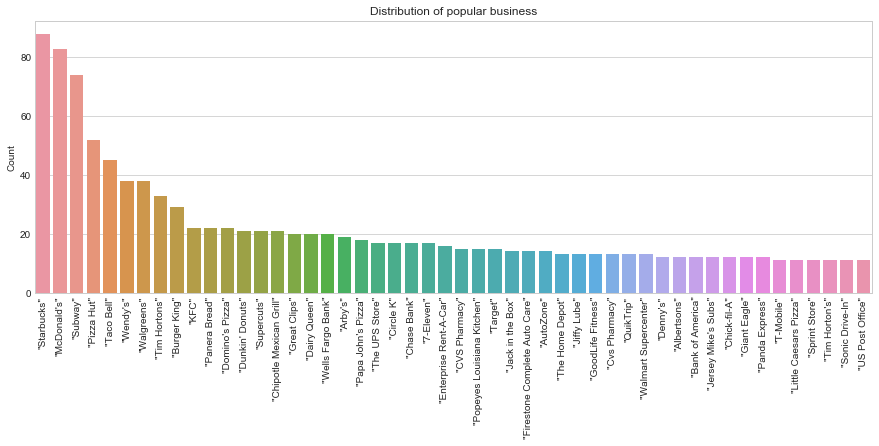

In [100]:
plt.figure(figsize=(15,5))
cnt = business_data['name'].value_counts()[:50].to_frame()
sns.barplot(cnt.index, cnt['name'])
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of popular business')
plt.show()


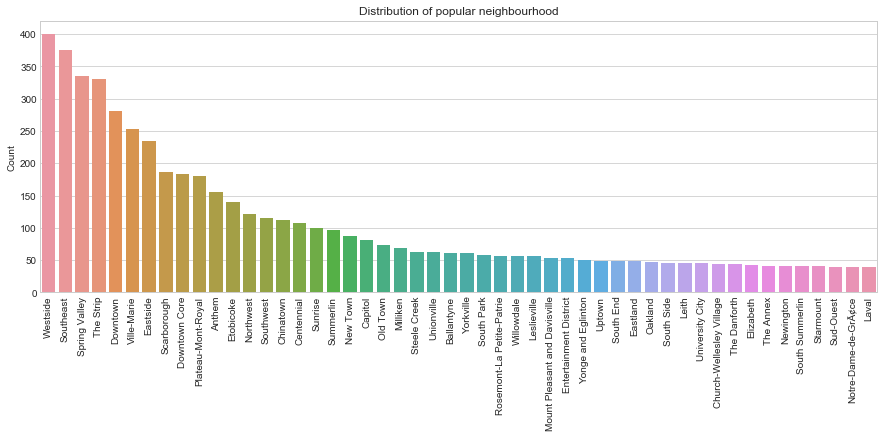

In [101]:
plt.figure(figsize=(15,5))
cnt = business_data['neighborhood'].value_counts()[:50].to_frame()
sns.barplot( cnt.index, cnt['neighborhood'])
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of popular neighbourhood')
plt.show()

Most of the businesses are rated at 4.0 whereas less businesses are rated at 1.0

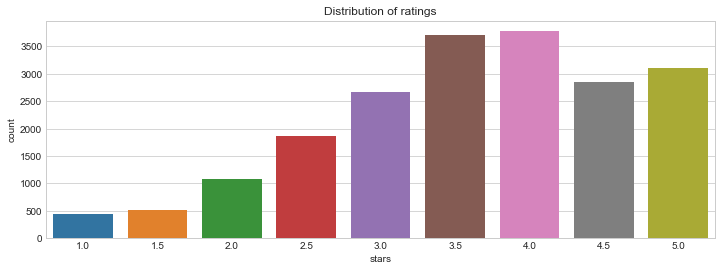

In [102]:
plt.figure(figsize=(12,4))
ax = sns.countplot(business_data['stars'])
plt.title('Distribution of ratings')
plt.show()

Wordcloud of the categories that are present

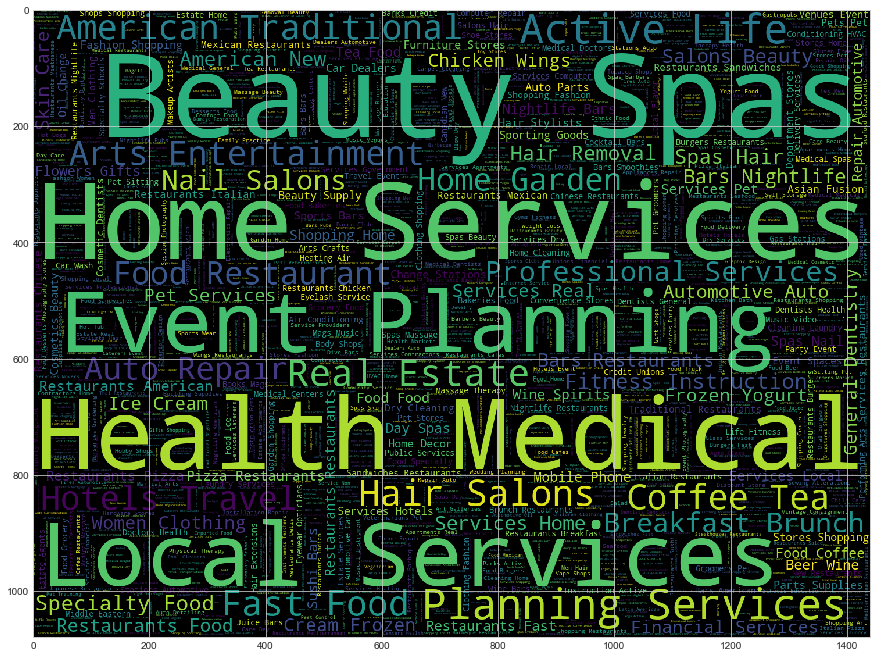

In [103]:
cloud = WordCloud(width=1440, height= 1080,max_words= 1500).generate(' '.join(business_data['categories'].astype(str)))
plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.show()

# Data anaylsis of reviews data and prediction of star ratings

In [104]:
review_data = pd.read_csv("C:/Users/NitOj/Documents/Applications/Jobs/Applications/NewYorker/yelp_review/yelp_review.csv", nrows=2000, encoding = "ISO-8859-1")

Reviews data has the following columns: <br>
    1) review_id <br>
    2) user_id <br>
    3) business_id <br>
    4) stars <br>
    5) data <br>
    6) text <br>
    7) useful <br>
    8) funny <br>
    9) cool <br>

In [105]:
review_data.head(10)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0
5,HRPm3vEZ_F-33TYVT7Pebw,_4iMDXbXZ1p1ONG297YEAQ,8QWPlVQ6D-OExqXoaD2Z1g,5,2014-09-24,Cycle Pub Las Vegas was a blast! Got a groupon...,1,0,0
6,ymAUG8DZfQcFTBSOiaNN4w,u0LXt3Uea_GidxRW1xcsfg,9_CGhHMz8698M9-PkVf0CQ,4,2012-05-11,Who would have guess that you would be able to...,0,0,2
7,8UIishPUD92hXtScSga_gw,u0LXt3Uea_GidxRW1xcsfg,gkCorLgPyQLsptTHalL61g,4,2015-10-27,Always drove past this coffee house and wonder...,1,0,0
8,w41ZS9shepfO3uEyhXEWuQ,u0LXt3Uea_GidxRW1xcsfg,5r6-G9C4YLbC7Ziz57l3rQ,3,2013-02-09,"Not bad!! Love that there is a gluten-free, ve...",1,0,0
9,WF_QTN3p-thD74hqpp2j-Q,u0LXt3Uea_GidxRW1xcsfg,fDF_o2JPU8BR1Gya--jRIA,5,2016-04-06,Love this place!\n\nPeggy is great with dogs a...,3,0,0


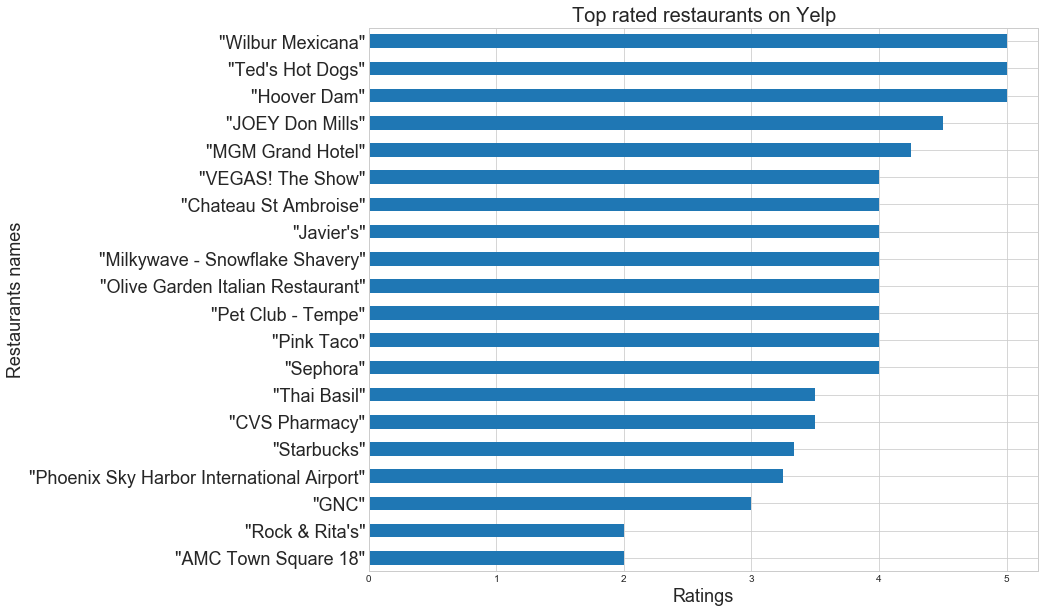

In [106]:
# df_yelp_review dataset has business id but don't have businesss name.
# But df_yelp_business_restaurants have business name and business id.
# So I take the df_yelp_review business_id and match with df_yelp_business_restaurants business id.
# And take the business name from df_yelp_business_restaurants and create a new column in df_yelp_review that holds business name
review_data['name'] = review_data['business_id'].map(business_data.set_index('business_id')['name'])
# take the top only 20 most occurances restaurants for analysis. Because the dataset has over thousand business id. It will be really inefficient if we take all of the business name
top_restaurants = review_data.name.value_counts().index[:20].tolist()
# create a new dataframe called 'df_review_top' that only contains the reviews of 'top_restaurants'
df_review_top = review_data.loc[review_data['name'].isin(top_restaurants)]
# now we take the name column and count mean of stars of each unique business name (I am using pandas groupby function for this. If you don't know what pandas groupby function does, please search on Google)
# then sort values in ascending order 
# then plot the graph
df_review_top.groupby(df_review_top.name)['stars'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
# set y ticks font size to 18 for easy readable purposes.
plt.yticks(fontsize=18)
# set the title of the graph
plt.title('Top rated restaurants on Yelp',fontsize=20)
# set y label of the graph and change fontsize to 18 for readablity purposes. 
plt.ylabel('Restaurants names', fontsize=18)
# set x label to 'Ratings'
plt.xlabel('Ratings', fontsize=18)
# now finally show the graph in a new window. 
plt.show()

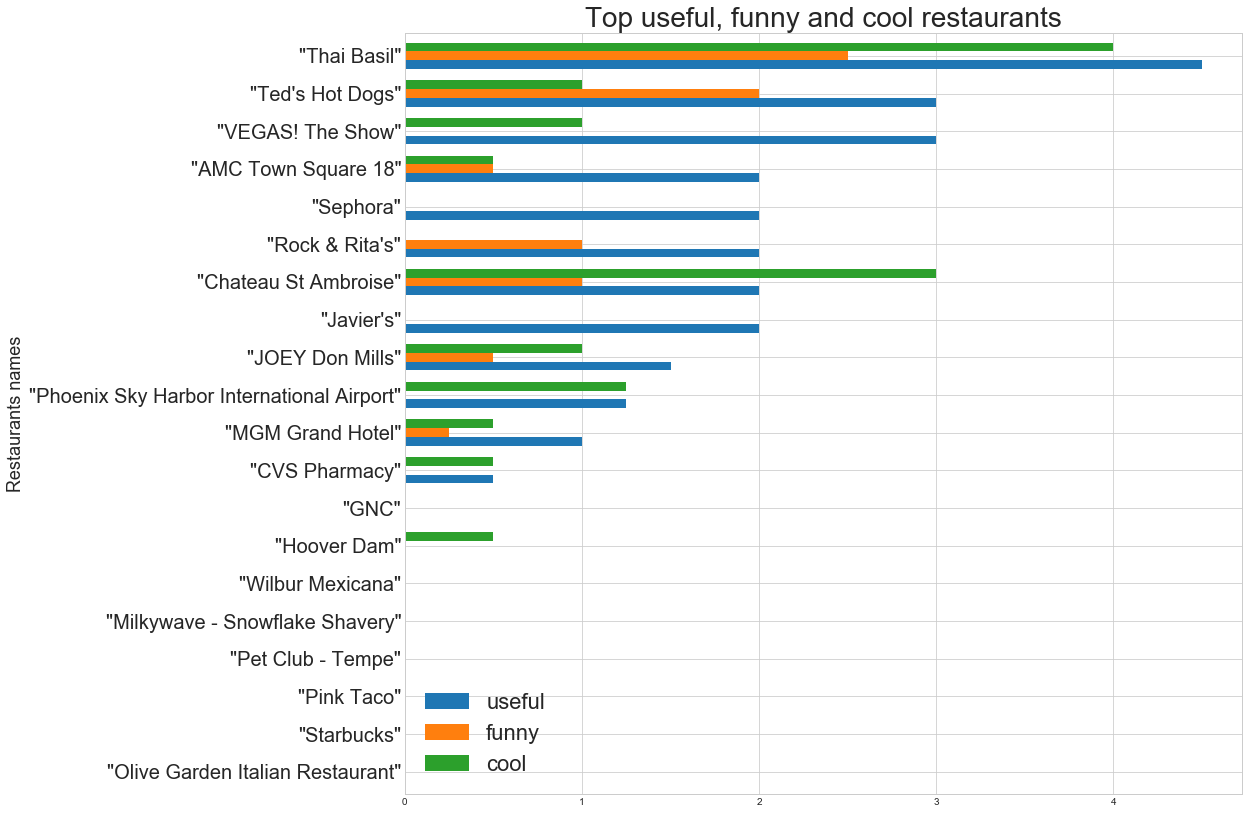

In [107]:
# now we take the name column and count mean of 'useful','funny', 'cool' of each unique business name (I am using pandas groupby function for this. If you don't know what pandas groupby function does, please search on Google)
# then sort values in ascending order 
# then plot the graph
review_data.groupby(df_review_top.name)[['useful','funny', 'cool']].mean().sort_values('useful',ascending=True).plot(kind='barh', figsize=(15, 14),width=0.7)
plt.yticks(fontsize=18)
plt.title('Top useful, funny and cool restaurants',fontsize=28)
plt.ylabel('Restaurants names', fontsize=18)
plt.yticks(fontsize=20)
plt.legend(fontsize=22)
plt.show()

In [160]:
review_data = pd.read_csv("C:/Users/NitOj/Documents/Applications/Jobs/Applications/NewYorker/yelp_review/yelp_review.csv", nrows=2000, encoding = "ISO-8859-1")

In [161]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NitOj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [162]:
lower_case = review_data['text'].str.lower().str.cat(sep=' ')

In [163]:
regexed = re.sub('[^A-Za-z]+', ' ', lower_case)
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

In [164]:
word_tokens = word_tokenize(regexed)
print(len(word_tokens))
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
print(len(filtered_sentence))

319966
160730


In [165]:
# filter the data where the single character words are removed
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
# clean the data by removing numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]   

Most frequent words bar chart. Now we know that the review show 'place', 'one', 'good', 'food', 'like', 'time', 'great' as the most frequent words

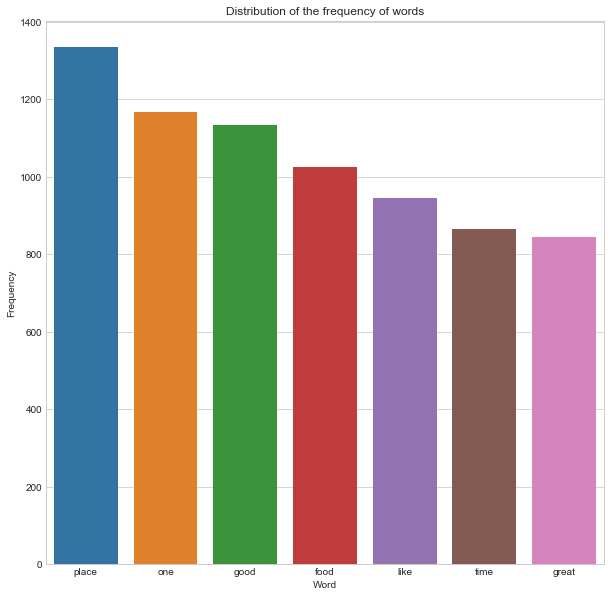

In [143]:
top_N = 100
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))
plt.title('Distribution of the frequency of words')
plt.show()

Wordcloud of the most used words

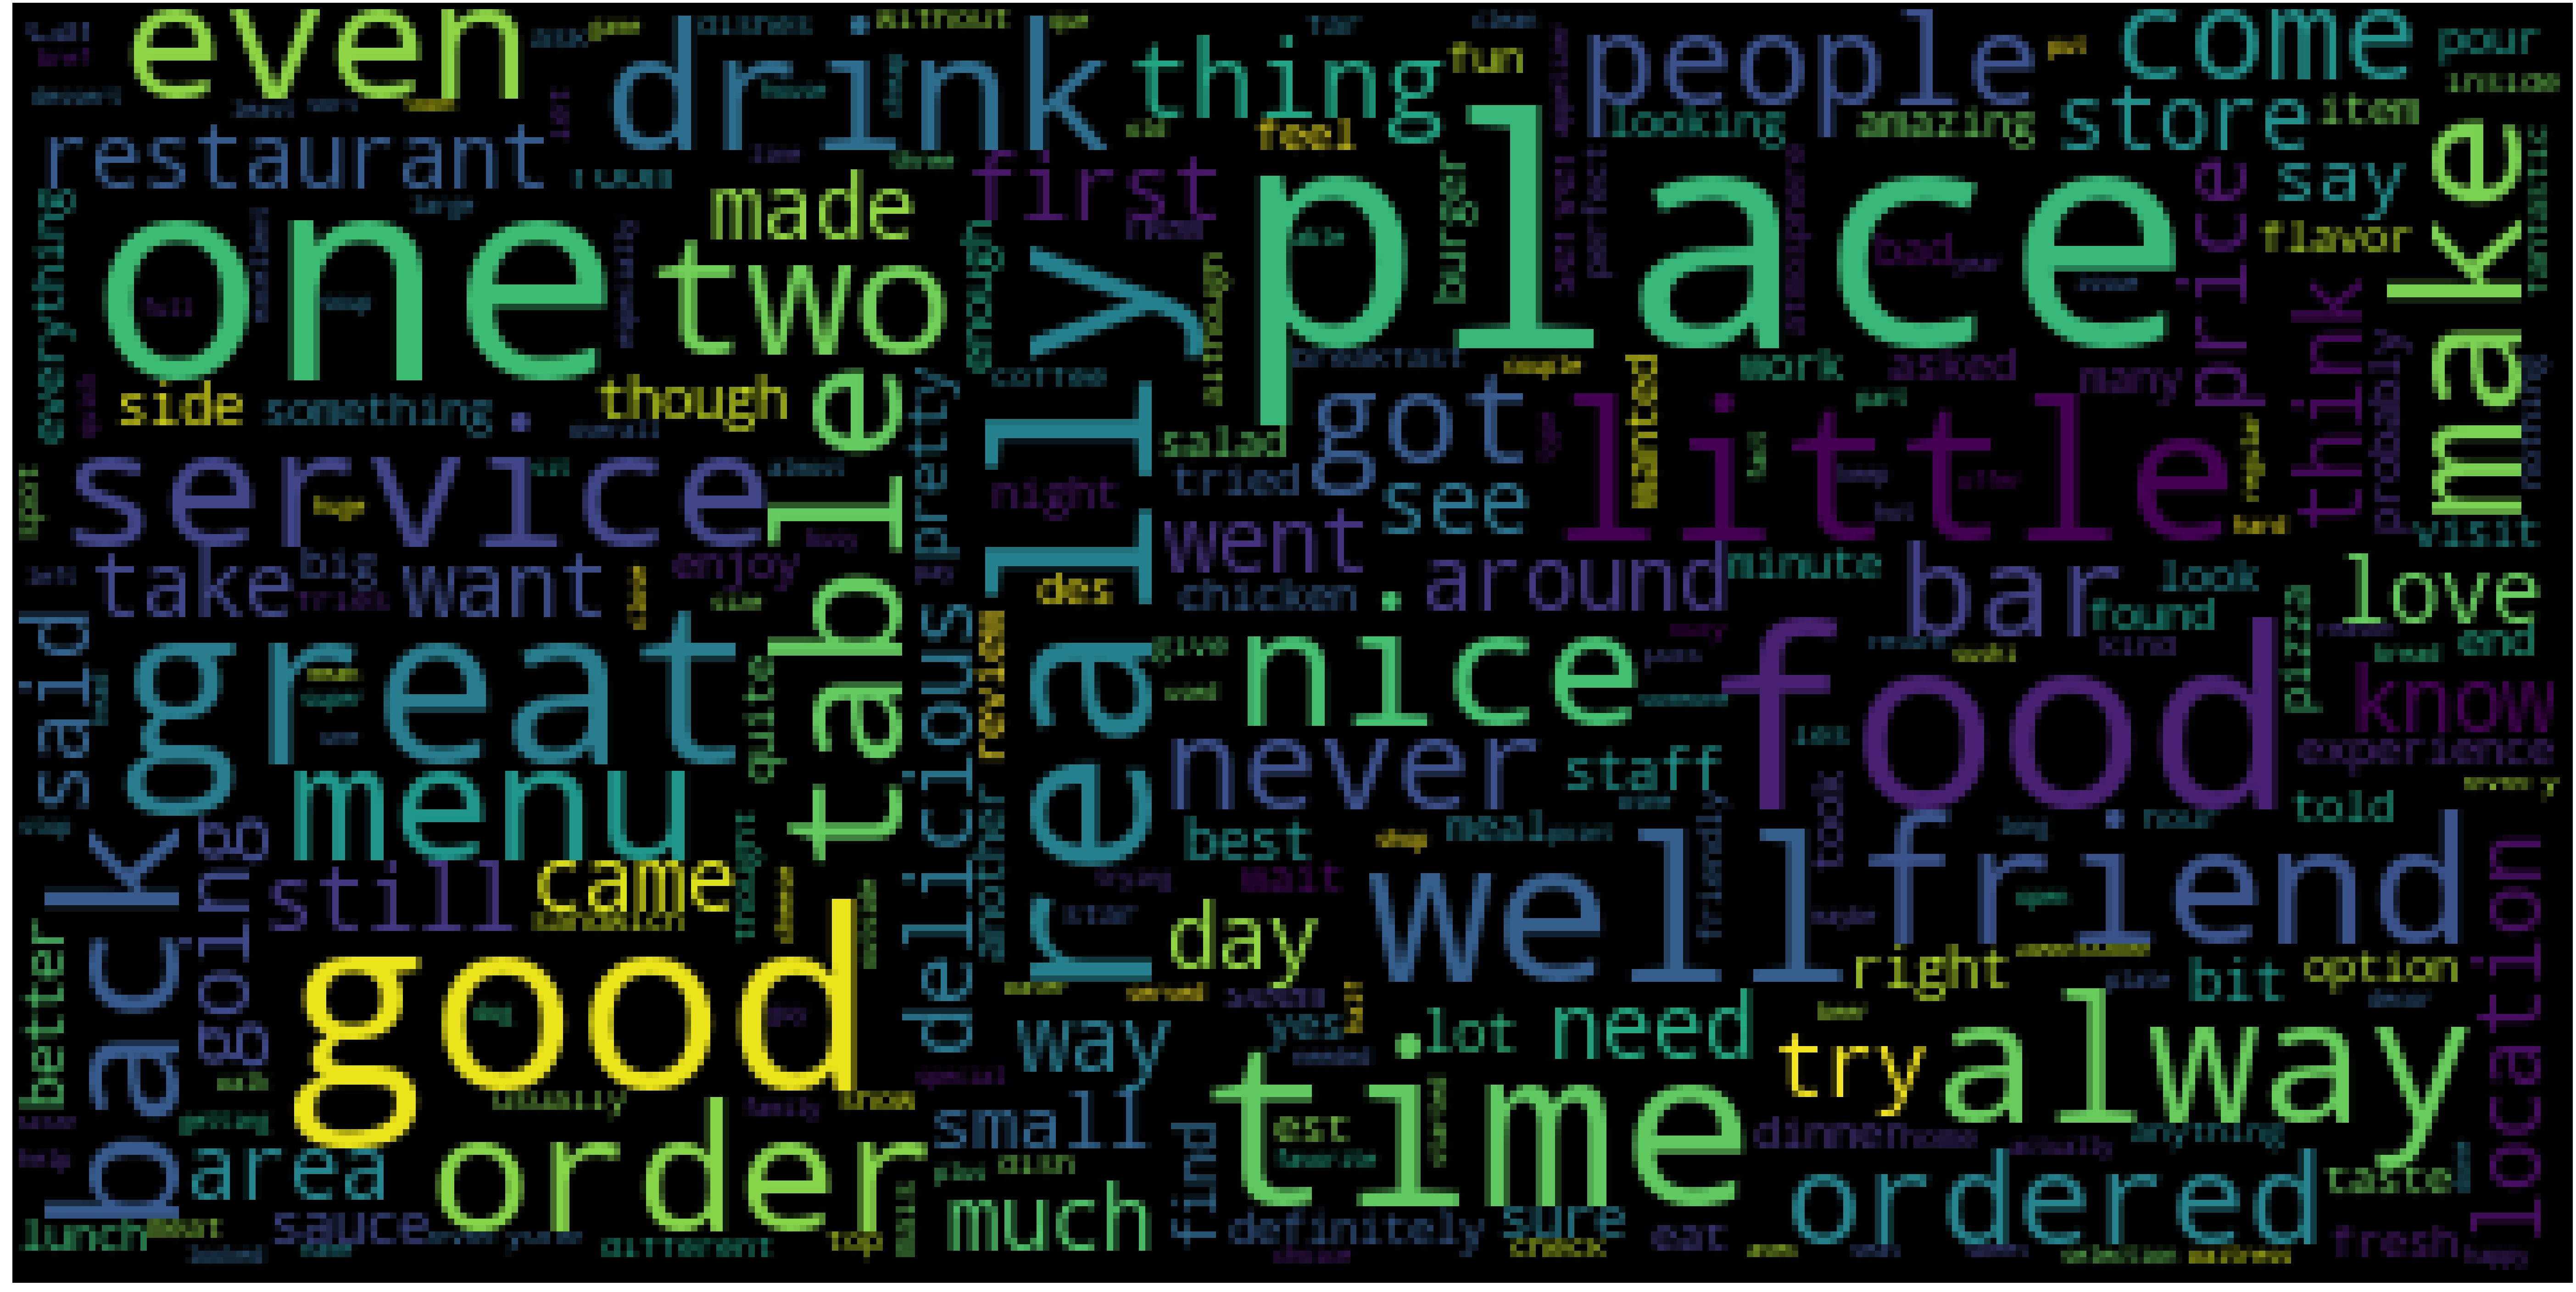

In [144]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
wc(cleaned_data_title,'black','Most Used Words')

In [145]:
bloblist_desc = list()
data_review_str=review_data['text'].astype(str)

for row in data_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    data_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])


In [146]:
def f(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        val = "Positive Review"
    elif df_polarity_desc['sentiment'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

Every test has been given sentiment value and polarity value. The sentiment is divided into three types: Positive, Neutral and Negative
The Bar chart shows the distribution of the sentiments. <br>
We can see that most the reviews are positive reviews 

In [147]:
data_polarity_desc['Sentiment_Type'] = data_polarity_desc.apply(f, axis=1)

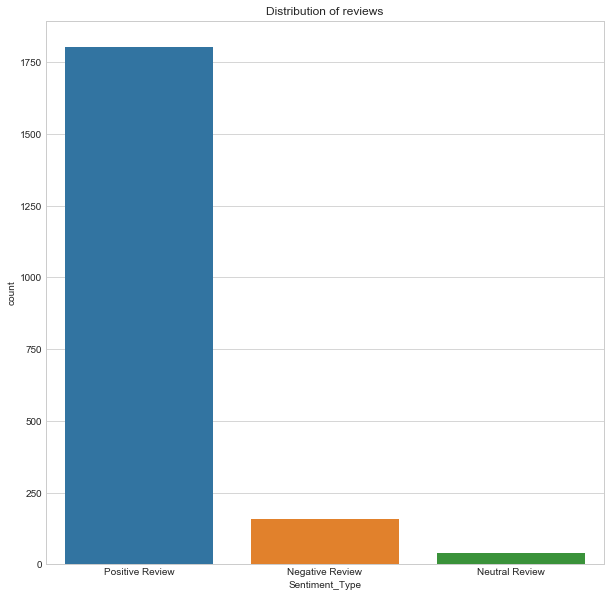

In [148]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=data_polarity_desc)
plt.title('Distribution of reviews')
plt.show()

In [149]:
positive_reviews=data_polarity_desc[data_polarity_desc['Sentiment_Type']=='Positive Review']
negative_reviews=data_polarity_desc[data_polarity_desc['Sentiment_Type']=='Negative Review']

Wordcloud shows the words in positive reviews

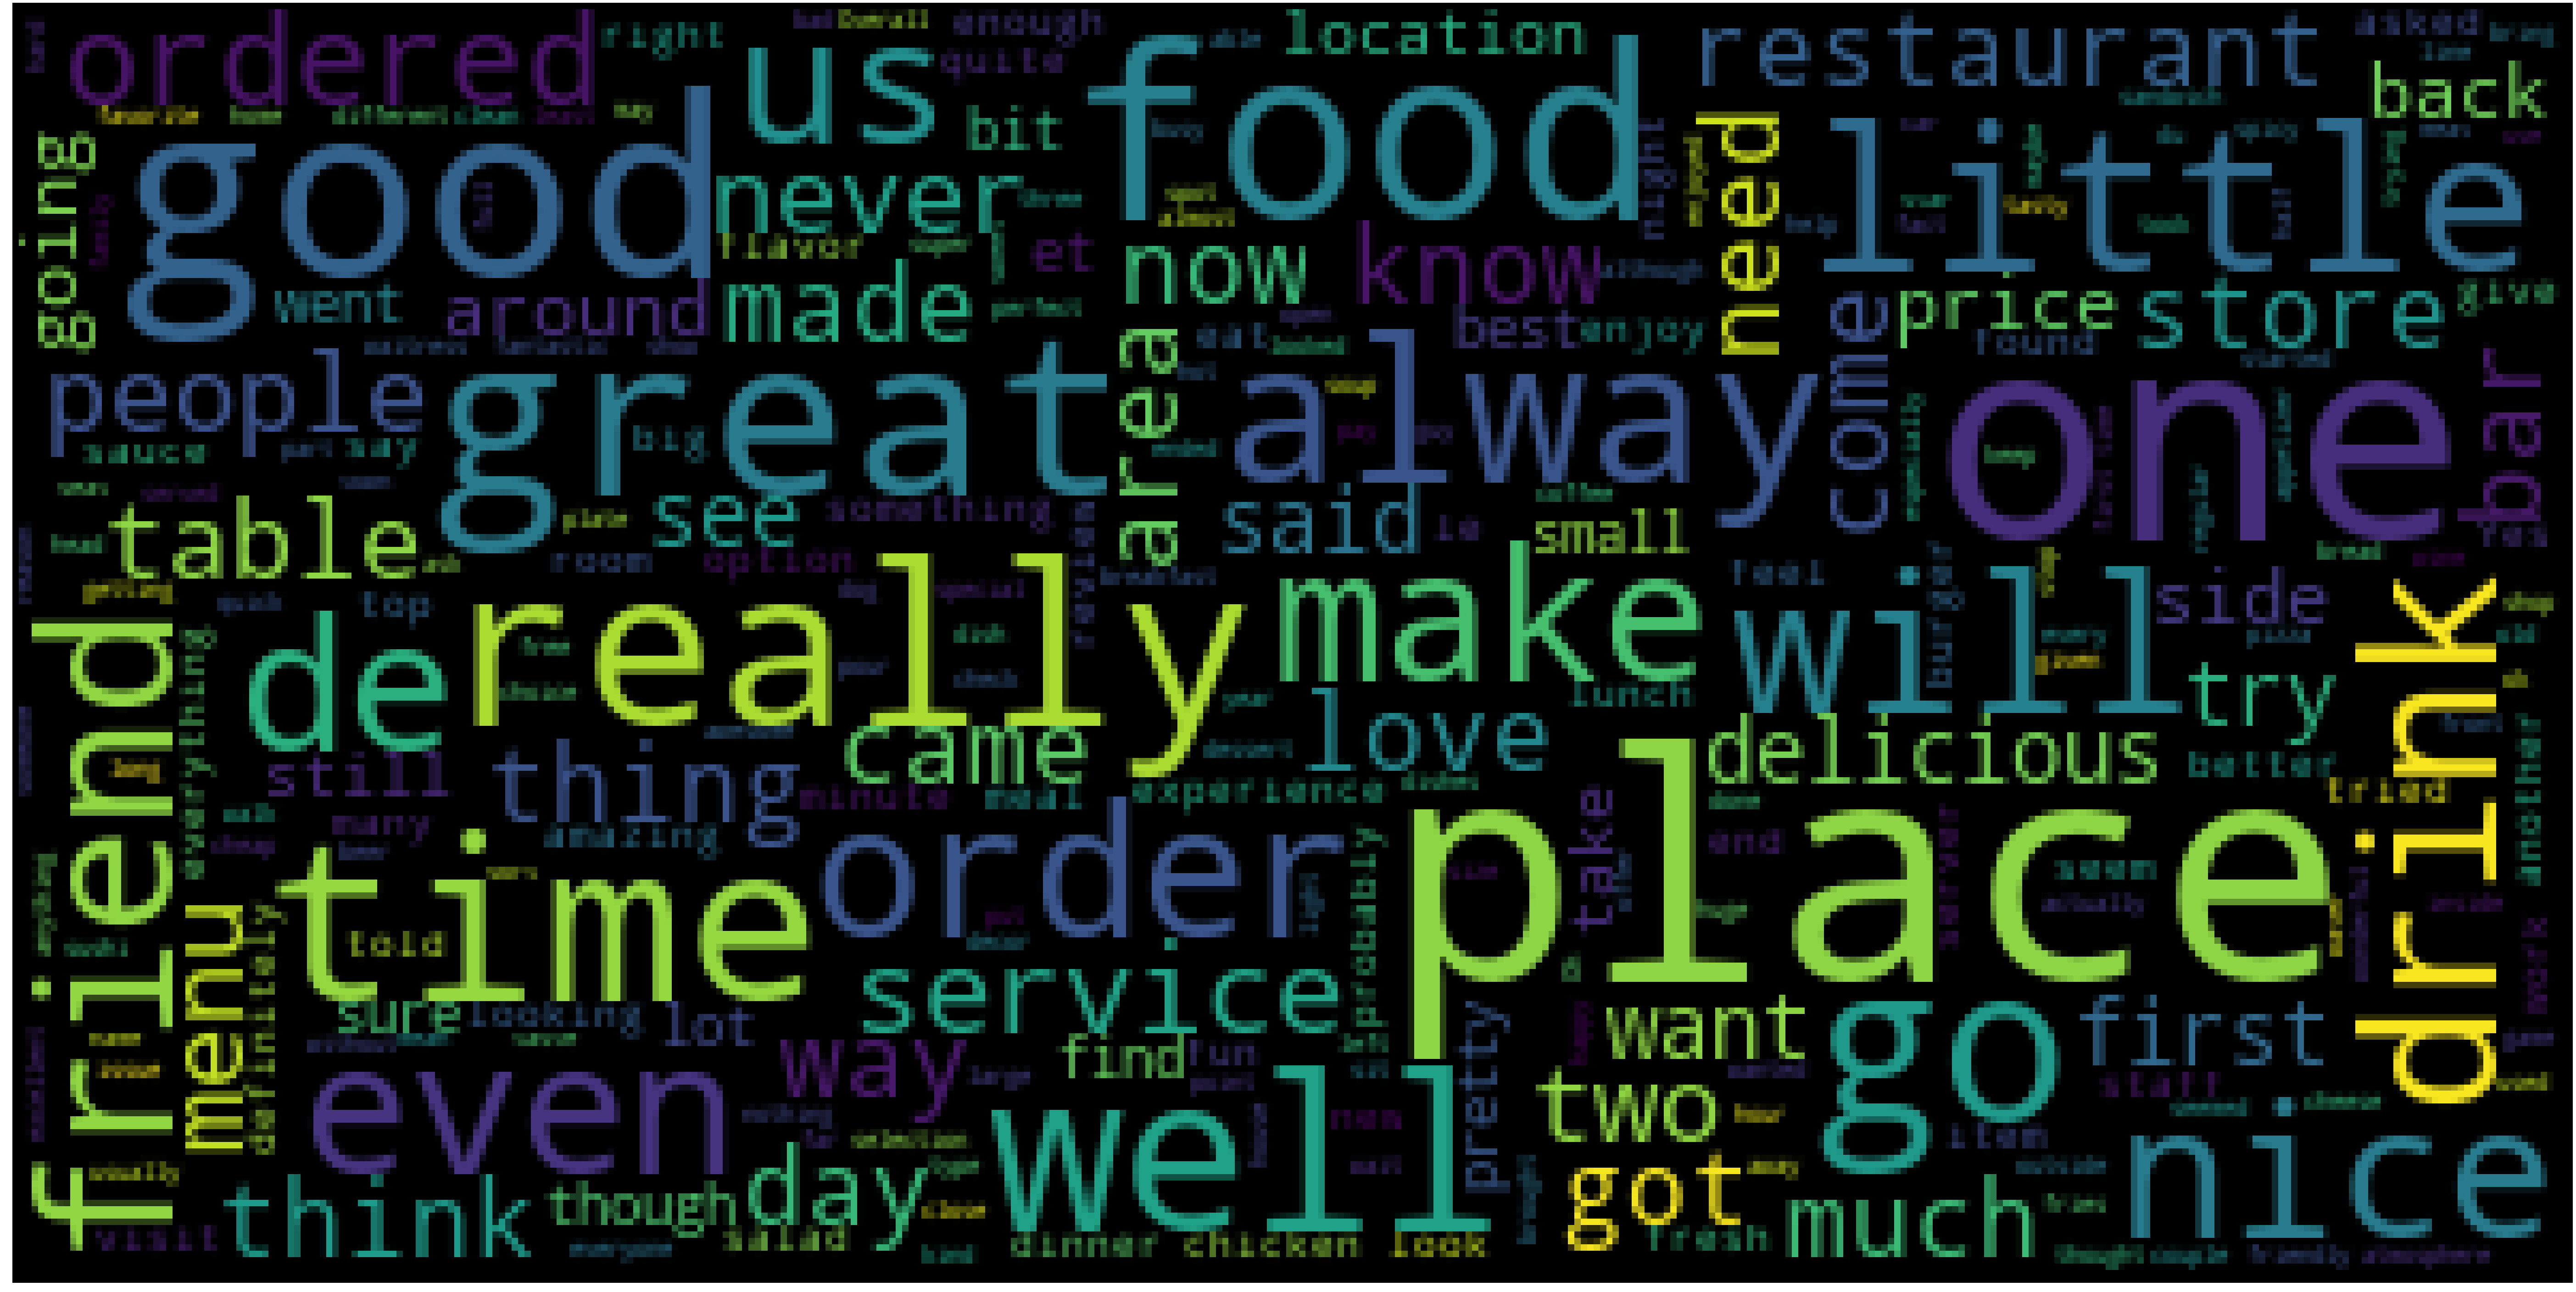

In [150]:
wc(positive_reviews['Review'],'black','Most Used Words')

Wordcloud shows the words in negative reviews

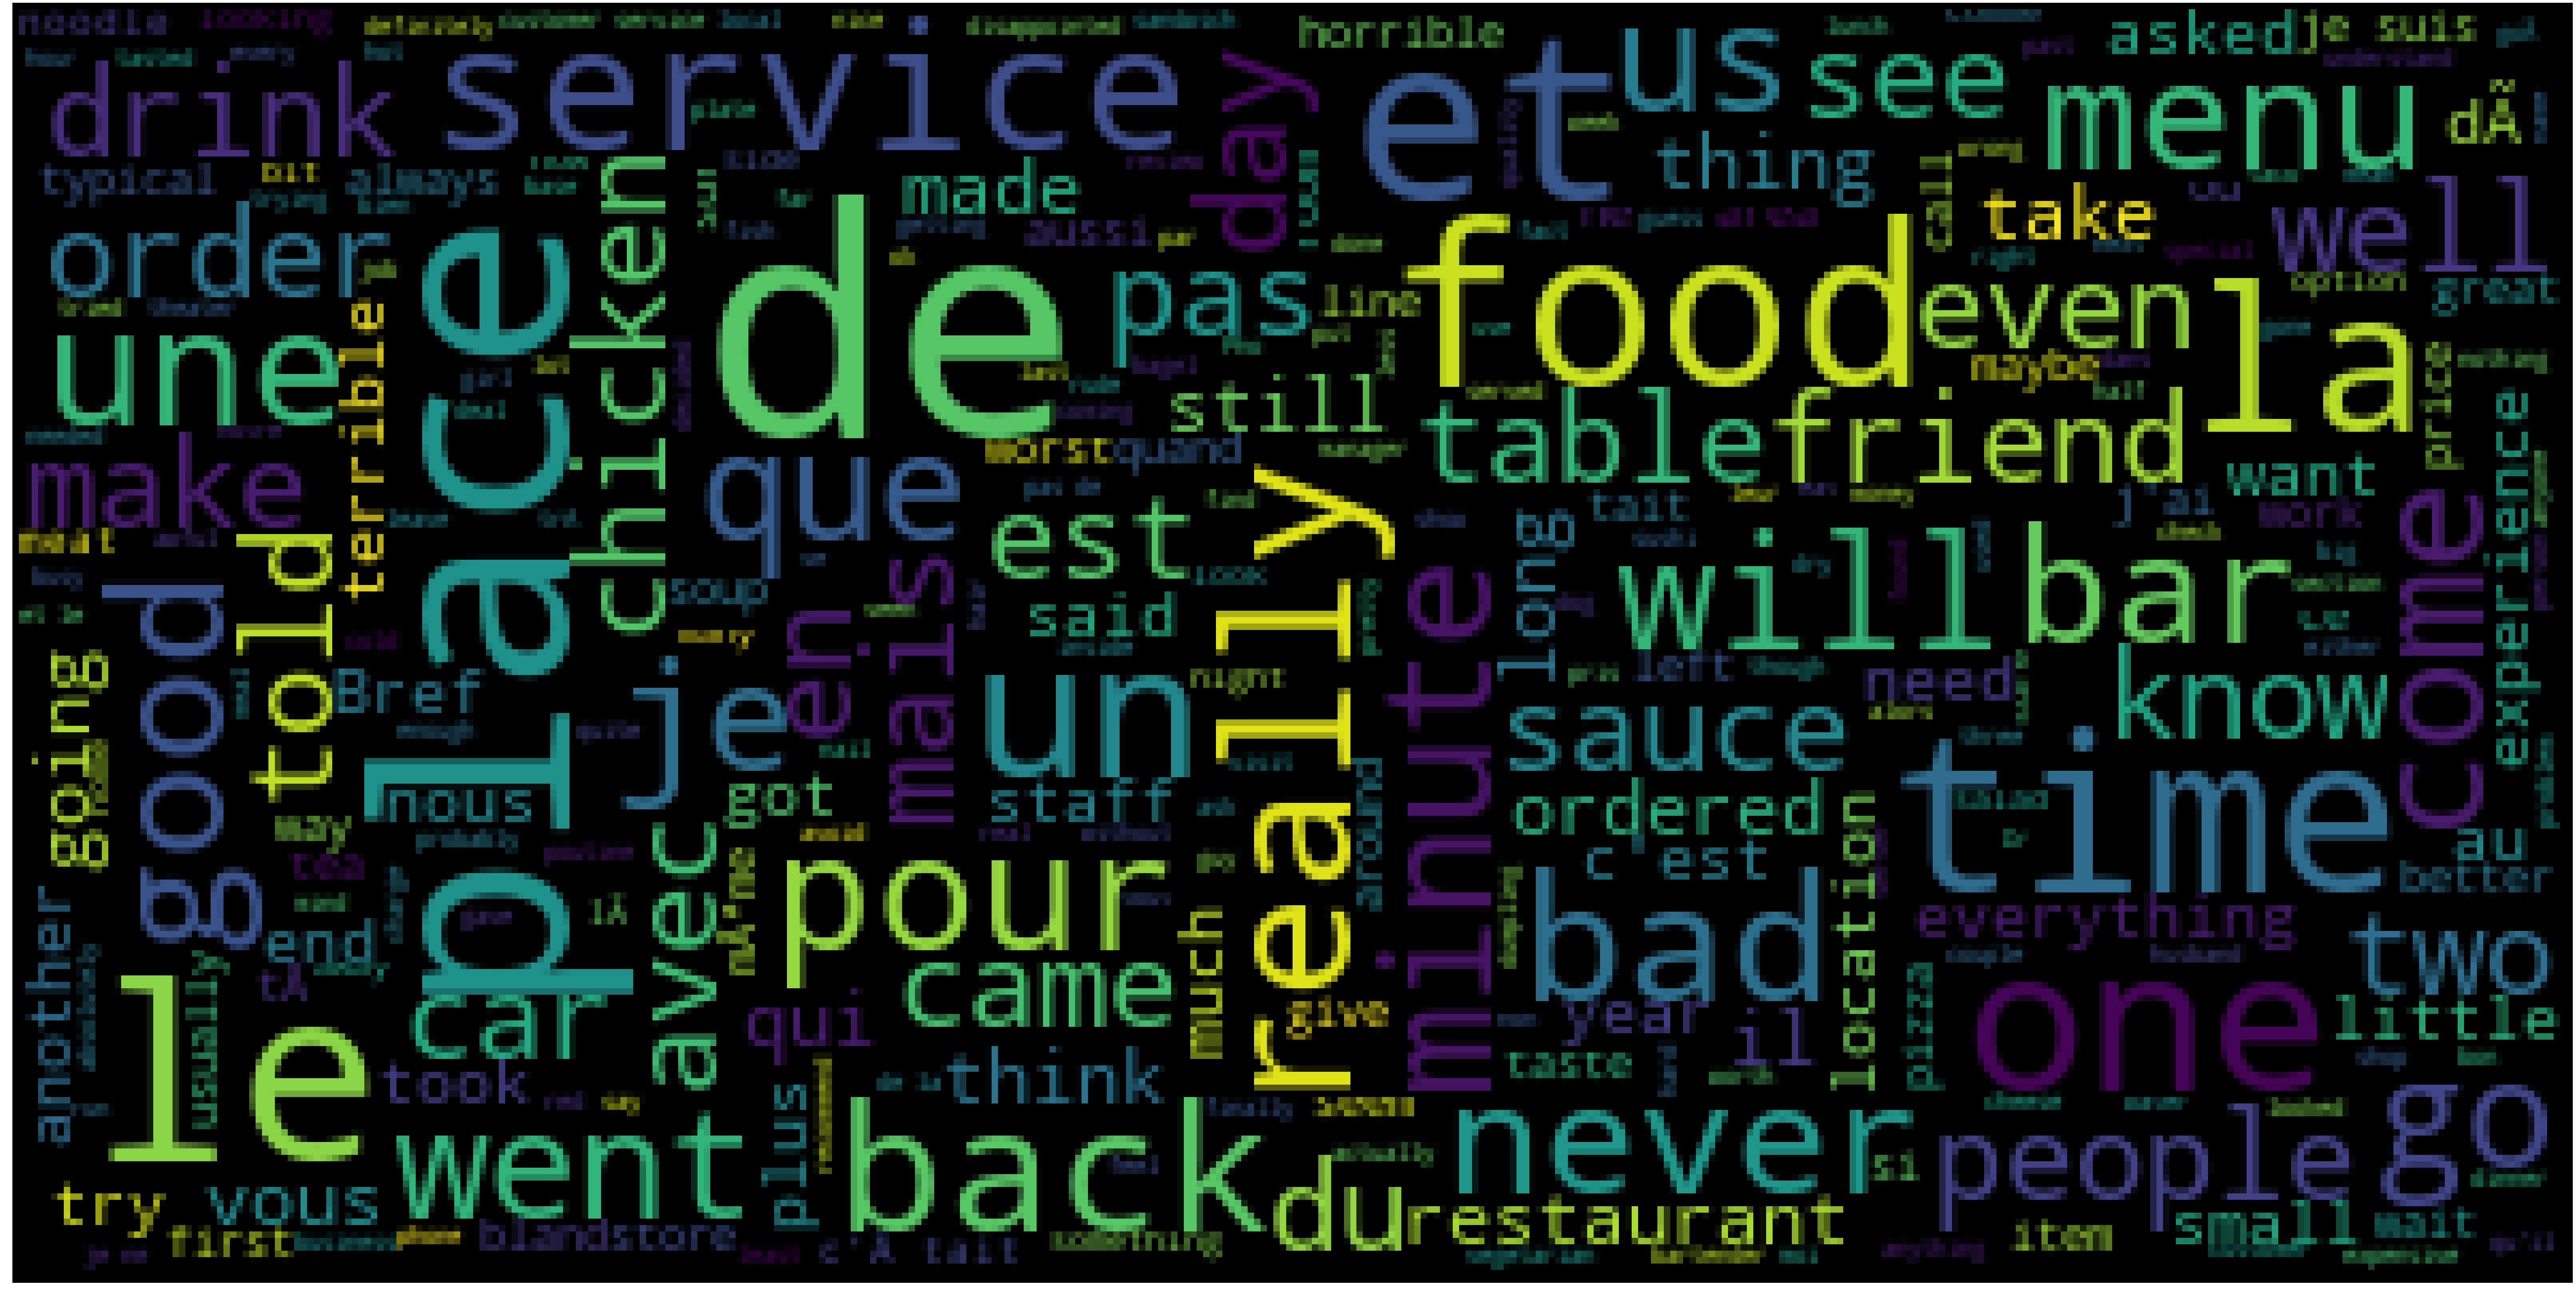

In [151]:
wc(negative_reviews['Review'],'black','Most Used Words')

In [152]:
review_data=review_data.dropna(axis=0,how='any')
rating_class = review_data[(review_data['stars'] == 1) | (review_data['stars'] == 5)]
X_review=rating_class['text']
y=rating_class['stars']

In [153]:
X_review.shape

(675,)

In [154]:
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [155]:
vect=CountVectorizer(analyzer=text_process).fit(X_review)

Classification of star ratings

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.3, random_state=101)

In [157]:
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    print(X_train.shape, X_test.shape)
    y_pred = model.predict(X_test)
    # prediction = model.predict(test_data)
    #y_pred = np.argmax(y_pred, axis=1)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   
    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    #plt.figure(figsize=(8,8))
    #plt.grid(b=False)
    #plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    #plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classification Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

In [ ]:
rfc = RandomForestClassifier(n_estimators=1500, max_depth=10, random_state=0)
rfc_results = perform_model(rfc, X_train, y_train, X_test, y_test, rating_class)

In [ ]:

nb = MultinomialNB()
nb_results =  perform_model(nb, X_train, y_train, X_test, y_test, rating_class)

In [ ]:
lr_model = LogisticRegression()
lr_results =  perform_model(lr_model, X_train, y_train, X_test, y_test, rating_class)

In [ ]:
svm = SVC(kernel='linear', C = 1.0)
svm_results =  perform_model(svm, X_train, y_train, X_test, y_test, rating_class)

In [ ]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42,n_estimators=1000,max_depth=5, min_child_weight=1,gamma=0)
xgb_model =  perform_model(xgb_model, X_train, y_train, X_test, y_test, rating_class)

In [ ]:

adaboost = AdaBoostClassifier(n_estimators=1500, learning_rate=1) 
adaboost_model =  perform_model(adaboost, X_train, y_train, X_test, y_test, rating_class)